# 1. Perprocess
## 1.1 parse XML
use BeautifulSoup to parse XML file, output with pandas dataframe "sentence, E#A, sentiment"

In [2]:
from bs4 import BeautifulSoup
import pandas as pd
with open("./data/Laptops_Train_p1.xml") as Laptops_Train_p1:
    soup = BeautifulSoup(Laptops_Train_p1, "xml")
#print(soup.prettify())

In [3]:
# Create empty lists to store the extracted data
sentence_ids = []
texts = []
categories = []
polarities = []

# Loop through the 'sentence' elements and extract the necessary information
for sentence in soup.find_all('sentence'):
    sentence_ids.append(sentence['id'])
    texts.append(sentence.find('text').text)
    opinions = sentence.find('Opinions')
    if opinions is not None:
        s_categories = []
        s_polarities = []
        for opinion in opinions.find_all('Opinion'):
            s_categories.append(opinion['category'])
            s_polarities.append(opinion['polarity'])
        categories.append(",".join(s_categories))
        polarities.append(",".join(s_polarities))
    else:
        categories.append(None)
        polarities.append(None)

# Create a pandas dataframe from the extracted data
df = pd.DataFrame({'Sentence ID': sentence_ids,
                   'Text': texts,
                   'Categories': categories,
                   'Polarities': polarities})
print(df)

                          Sentence ID  \
0                                79:0   
1                                79:1   
2                                79:2   
3                                79:3   
4                                79:4   
...                               ...   
2495  B00KMRGF28_143_A2F0D5EV8ZOK44:1   
2496  B00KMRGF28_143_A2F0D5EV8ZOK44:2   
2497  B00KMRGF28_143_A2F0D5EV8ZOK44:3   
2498  B00KMRGF28_302_A149BES2K4UIY1:0   
2499  B00KMRGF28_302_A149BES2K4UIY1:1   

                                                   Text  \
0                     Being a PC user my whole life....   
1                This computer is absolutely AMAZING!!!   
2                           10 plus hours of battery...   
3     super fast processor and really nice graphics ...   
4     and plenty of storage with 250 gb(though I wil...   
...                                                 ...   
2495                        It does what it advertises.   
2496  Price is great, wish it didn'

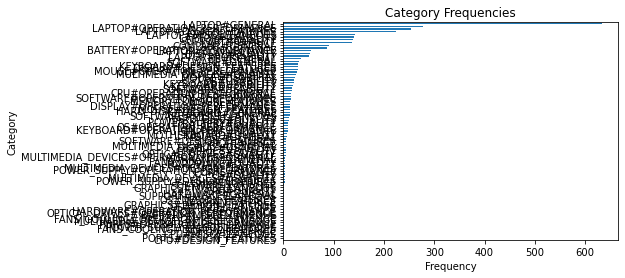

In [25]:
# Data analysis
import matplotlib.pyplot as plt

# Split categories and create new rows
df_copy = df.copy()
split_categories = df_copy['Category'].str.split(',')
df_copy = df_copy.assign(Category=split_categories).explode('Category')

# Get the unique categories and their frequencies
category_counts = df_copy['Category'].value_counts()
#top_categories = category_counts.head(50)

# Plot the frequencies in descending order
category_counts.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Category Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.show()

## 1.2 tokenisation, (stopwords,punc removal), lemmatization

In [30]:
import nltk
##tokenisation
from nltk.tokenize import word_tokenize
def tokenisation(data):
    tokenised_data = [word_tokenize(sentence.lower()) for sentence in data]
    return tokenised_data

In [40]:
##stopwords removal
from nltk.corpus import stopwords
def remove_stopwords(data):
    stopwords = stopwords.words('english')
    filtered_words = [[word for word in sentence if word.lower() not in stopwords] for sentence in data]
    return filter_words
#print(stopwords.words('english'))
import re
def remove_punctuation(data):
    text = [[word for word in sentence if re.sub(r'[^\w\s]+', '', word).isalnum()] for sentence in data]
    return text

In [41]:
##lemmatization
from nltk import stem
def lemmatization(data):
    wnl = stem.WordNetLemmatizer()
    lematized = [[wnl.lemmatize(word) for word in sentence] for sentence in tokenised_data]
    return lematized

In [44]:
data = df['Text'].values.tolist()
data = tokenisation(data)
#data = remove_stopwords(data)
data = remove_punctuation(data)
dat = lemmatization(data)
print(data)

[['being', 'a', 'pc', 'user', 'my', 'whole', 'life'], ['this', 'computer', 'is', 'absolutely', 'amazing'], ['10', 'plus', 'hours', 'of', 'battery'], ['super', 'fast', 'processor', 'and', 'really', 'nice', 'graphics', 'card'], ['and', 'plenty', 'of', 'storage', 'with', '250', 'gb', 'though', 'i', 'will', 'upgrade', 'this', 'and', 'the', 'ram'], ['this', 'computer', 'is', 'really', 'fast', 'and', 'i', "'m", 'shocked', 'as', 'to', 'how', 'easy', 'it', 'is', 'to', 'get', 'used', 'to'], ['i', "'ve", 'only', 'had', 'mine', 'a', 'day', 'but', 'i', "'m", 'already', 'used', 'to', 'it'], ['macs', 'are', 'amazing'], ['get', 'this', 'computer', 'for', 'portability', 'and', 'fast', 'processing'], ['the', 'laptop', 'was', 'really', 'good', 'and', 'it', 'goes', 'really', 'fast', 'just', 'the', 'way', 'i', 'thought', 'it', 'would', 'of', 'run'], ['i', 'would', 'really', 'recommend', 'to', 'any', 'person', 'out', 'there', 'to', 'get', 'this', 'laptop', 'cause', 'its', 'really', 'worth', 'it'], ['and', 

# 2. Model - Max Entropy Classifier with threshold t
## 2.1 Preprocess - encoding